# Analysis of Bias in the diabetes dataset


### NOTE: the initial target for this analysis is 'readmitted'
 - eval readmission rates across the categorical features such as race, gender, admission type, discharge dispo, age etc.
 - discharge classifier..., discharge rates across the same features...
 - regression for health outcomes vs number of procedures...
 - regression for number of days vs discharge dispo..

In [1]:
#import libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels


In [2]:
#max rows and cols
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [3]:
pwd

'/Users/charles.tippett/Documents/MTSU/DATA6550/Projects/Group5/DATA6550_Group5/DATA6550_Bias/Analysis'

In [4]:
cd ..

/Users/charles.tippett/Documents/MTSU/DATA6550/Projects/Group5/DATA6550_Group5/DATA6550_Bias


In [5]:
ls

Analysis/      Collaboration/ LICENSE
Code/          Data/          README.md


In [6]:
df = pd.read_csv("Data/diabetes_data.csv")

In [7]:
df.head()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_catg
0,2278392,8222157,Caucasian,Female,u,u,r,1,41,0,1,0,0,0,Diabetes,Other,Other,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,1.0
1,149190,55629189,Caucasian,Female,k,d,o,3,59,0,18,0,0,0,Other,Diabetes,Other,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,1.0
2,64410,86047875,AfricanAmerican,Female,k,d,o,2,11,5,13,2,0,1,Other,Diabetes,Other,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,1.0
3,500364,82442376,Caucasian,Male,k,d,o,2,44,1,16,0,0,0,Other,Diabetes,Circulatory,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,1.0
4,16680,42519267,Caucasian,Male,k,d,o,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100111 entries, 0 to 100110
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              100111 non-null  int64  
 1   patient_nbr               100111 non-null  int64  
 2   race                      100111 non-null  object 
 3   gender                    100111 non-null  object 
 4   admission_type_id         100111 non-null  object 
 5   discharge_disposition_id  100111 non-null  object 
 6   admission_source_id       100111 non-null  object 
 7   time_in_hospital          100111 non-null  int64  
 8   num_lab_procedures        100111 non-null  int64  
 9   num_procedures            100111 non-null  int64  
 10  num_medications           100111 non-null  int64  
 11  number_outpatient         100111 non-null  int64  
 12  number_emergency          100111 non-null  int64  
 13  number_inpatient          100111 non-null  i

## Step1: create readmit_status so it's Yes/No and get a feel for the proportions

In [9]:
df.readmitted.head(25)

0      NO
1     >30
2      NO
3      NO
4      NO
5     >30
6      NO
7     >30
8      NO
9      NO
10    >30
11    <30
12    <30
13     NO
14    >30
15     NO
16    <30
17     NO
18    >30
19     NO
20     NO
21     NO
22     NO
23    >30
24     NO
Name: readmitted, dtype: object

In [10]:
#create readmit_status
df['readmit_status'] = df['readmitted'].apply(lambda x: 'NO' if x == 'NO' else 'YES')

print(df[['readmitted', 'readmit_status']].head())
print(df['readmit_status'].value_counts())

  readmitted readmit_status
0         NO             NO
1        >30            YES
2         NO             NO
3         NO             NO
4         NO             NO
readmit_status
NO     53209
YES    46902
Name: count, dtype: int64


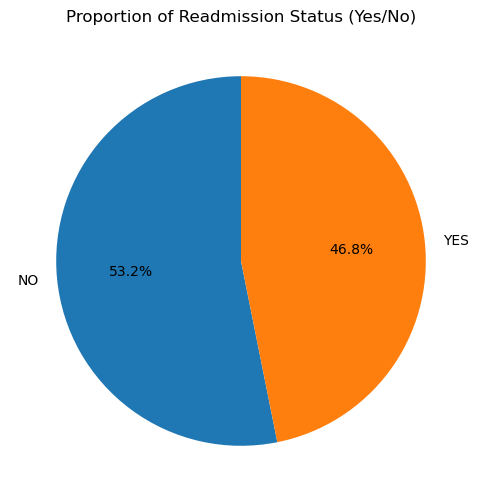

In [11]:
#CHART1 - readmit_status
readmit_counts = df['readmit_status'].value_counts()
readmit_proportions = df['readmit_status'].value_counts(normalize=True)

plt.figure(figsize=(6, 6))
plt.pie(readmit_proportions, labels=readmit_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Readmission Status (Yes/No)")
plt.show()

In [12]:
#Yes only
readmitted_YES = df[df['readmitted']!= 'NO']
readmitted_YES.shape

(46902, 46)

In [13]:
print(readmitted_YES['readmitted'].value_counts())

readmitted
>30    35545
<30    11357
Name: count, dtype: int64


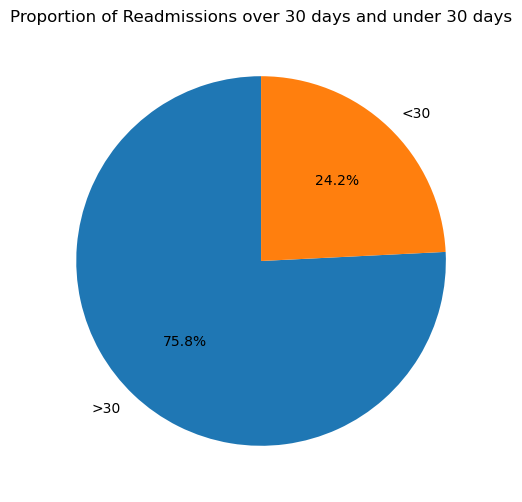

In [14]:
#CHART2 - Readmit <>30 days proportions
readmitted_counts = readmitted_YES['readmitted'].value_counts()
readmitted_proportions = readmitted_YES['readmitted'].value_counts(normalize=True)

plt.figure(figsize=(6, 6))
plt.pie(readmitted_proportions, labels=readmitted_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Readmissions over 30 days and under 30 days")
plt.show()

## Step2: readmit by race

In [15]:
#counts by race
race_counts = df['race'].value_counts().reset_index()
race_counts.rename(columns={'index': 'race', 'race': 'total_count'}, inplace=True)
race_counts

,total_count,count
0,Caucasian,74845
1,AfricanAmerican,18888
2,Unknown,2237
3,Hispanic,2024
4,Other,1485
5,Asian,632


In [35]:
#rename total count to race
race_counts.rename(columns={'total_count': 'race'}, inplace=True)
race_counts


,race,count
0,Caucasian,74845
1,AfricanAmerican,18888
2,Unknown,2237
3,Hispanic,2024
4,Other,1485
5,Asian,632


In [39]:
#readmits by race

#rename count to total pop so it's not confusing
race_counts = race_counts.rename(columns={'count': 'total_population'})

#mergge tables
readmits_by_race = readmits_by_race.merge(race_counts[['race', 'total_population']], on='race', how='left')

#readmit % 
readmits_by_race['readmission_percentage'] = (
    readmits_by_race['readmission_count'] / readmits_by_race['total_population']
) * 100

# Verify the structure
print(readmits_by_race.head())


              race  readmission_count  readmission_percentage  count_x  \
0  AfricanAmerican               8789               46.532190    18888   
1            Asian                226               35.759494      632   
2        Caucasian              35716               47.719955    74845   
3         Hispanic                854               42.193676     2024   
4            Other                591               39.797980     1485   

   count_y  count  total_population_x  total_population_y  total_population  
0    18888  18888               18888               18888             18888  
1      632    632                 632                 632               632  
2    74845  74845               74845               74845             74845  
3     2024   2024                2024                2024              2024  
4     1485   1485                1485                1485              1485  


In [41]:
# Perform the merge while ensuring only necessary columns are kept
readmits_by_race = readmits_by_race.merge(
    race_counts[['race', 'total_population']], 
    on='race', 
    how='left', 
    suffixes=('', '_drop')  # Add a suffix to redundant columns
)

# Drop any duplicate columns that were merged in
readmits_by_race = readmits_by_race[[col for col in readmits_by_race.columns if not col.endswith('_drop')]]

# Ensure final structure
print(readmits_by_race.head())


              race  readmission_count  readmission_percentage  count_x  \
0  AfricanAmerican               8789               46.532190    18888   
1            Asian                226               35.759494      632   
2        Caucasian              35716               47.719955    74845   
3         Hispanic                854               42.193676     2024   
4            Other                591               39.797980     1485   

   count_y  count  total_population_x  total_population_y  total_population  
0    18888  18888               18888               18888             18888  
1      632    632                 632                 632               632  
2    74845  74845               74845               74845             74845  
3     2024   2024                2024                2024              2024  
4     1485   1485                1485                1485              1485  


In [48]:
#clean up redun cols and reorder cols so they make more sense
readmits_by_race = readmits_by_race.drop(columns=['count_x', 'count_y', 'count', 'total_population_x', 'total_population_y'], errors='ignore')
#move total_population right after race
readmits_by_race = readmits_by_race[['race', 'total_population', 'readmission_count', 'readmission_percentage']]
#rename readisssion percentage to readmit%_race
readmits_by_race = readmits_by_race.rename(columns={'readmission_percentage': 'readmit%_race'})

readmits_by_race

,race,total_population,readmission_count,readmit%_race
0,AfricanAmerican,18888,8789,46.532190
1,Asian,632,226,35.759494
2,Caucasian,74845,35716,47.719955
3,Hispanic,2024,854,42.193676
4,Other,1485,591,39.797980
5,Unknown,2237,726,32.454180


In [50]:
#all readmits (not just by race)
total_readmissions = readmits_by_race['readmission_count'].sum()
#%
readmits_by_race['readmit%_all'] = (readmits_by_race['readmission_count'] / total_readmissions) * 100
readmits_by_race

,race,total_population,readmission_count,readmit%_race,readmit%_all
0,AfricanAmerican,18888,8789,46.532190,18.739073
1,Asian,632,226,35.759494,0.481856
2,Caucasian,74845,35716,47.719955,76.150271
3,Hispanic,2024,854,42.193676,1.820818
4,Other,1485,591,39.797980,1.260074
5,Unknown,2237,726,32.454180,1.547908


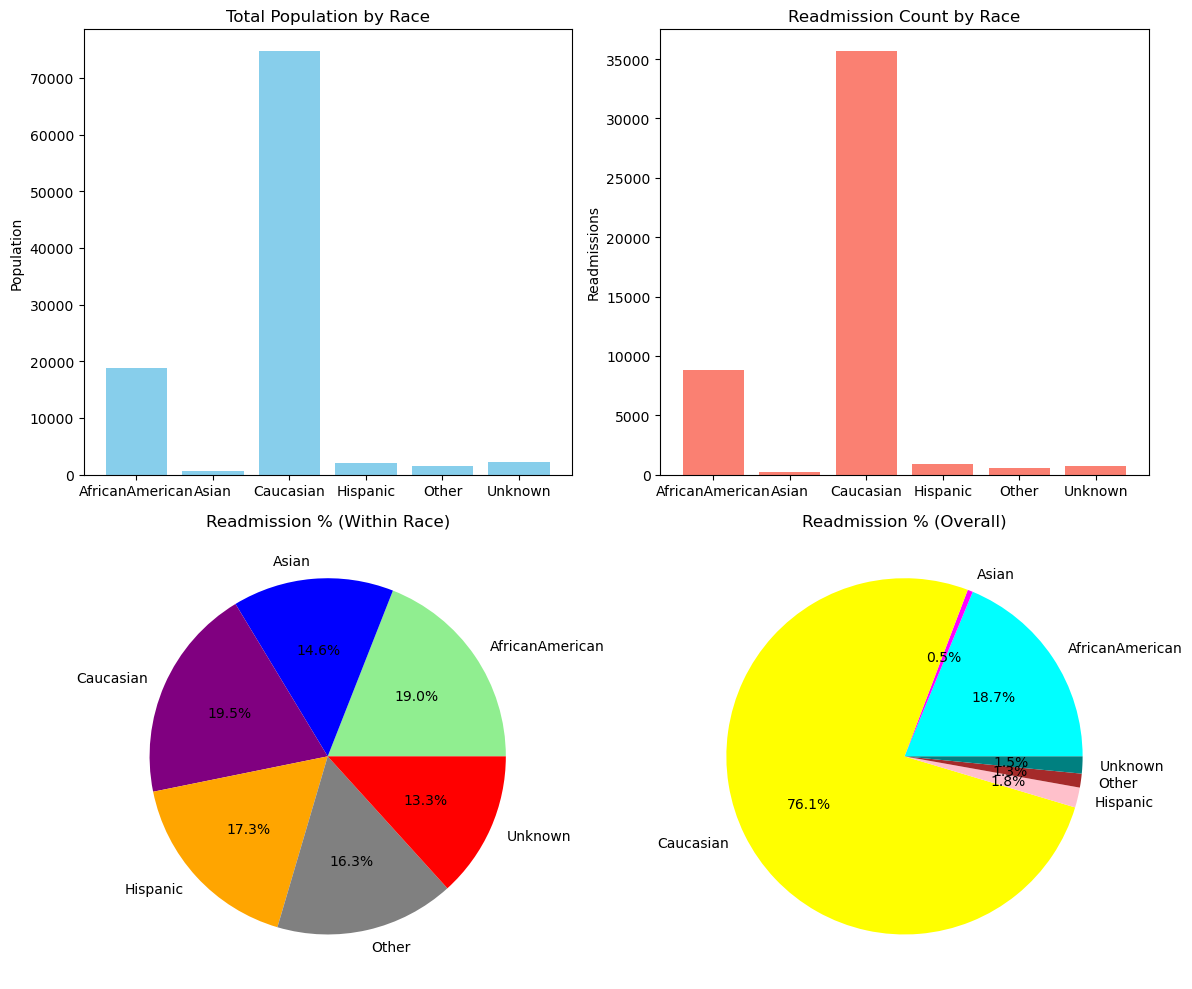

In [52]:
#subplots for readmits by race

race_labels = ["AfricanAmerican", "Asian", "Caucasian", "Hispanic", "Other", "Unknown"]
total_population = [18888, 632, 74845, 2024, 1485, 2237]
readmission_count = [8789, 226, 35716, 854, 591, 726]
readmit_percent_race = [46.53, 35.76, 47.72, 42.19, 39.80, 32.45]
readmit_percent_all = [18.74, 0.48, 76.15, 1.82, 1.26, 1.55]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#total pop bar
axes[0, 0].bar(race_labels, total_population, color='skyblue')
axes[0, 0].set_title("Total Population by Race")
axes[0, 0].set_ylabel("Population")

#readmits bar
axes[0, 1].bar(race_labels, readmission_count, color='salmon')
axes[0, 1].set_title("Readmission Count by Race")
axes[0, 1].set_ylabel("Readmissions")

#readmits by race pie
axes[1, 0].pie(readmit_percent_race, labels=race_labels, autopct='%1.1f%%', 
                colors=['lightgreen', 'blue', 'purple', 'orange', 'gray', 'red'])
axes[1, 0].set_title("Readmission % (Within Race)")

#readmits all pie%
axes[1, 1].pie(readmit_percent_all, labels=race_labels, autopct='%1.1f%%', 
                colors=['cyan', 'magenta', 'yellow', 'pink', 'brown', 'teal'])
axes[1, 1].set_title("Readmission % (Overall)")

# Adjust layout
plt.tight_layout()
plt.show()
